# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [3]:
# Your code here :
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_test.shape

(10000, 1)

In [6]:
y_train.shape

(50000, 1)

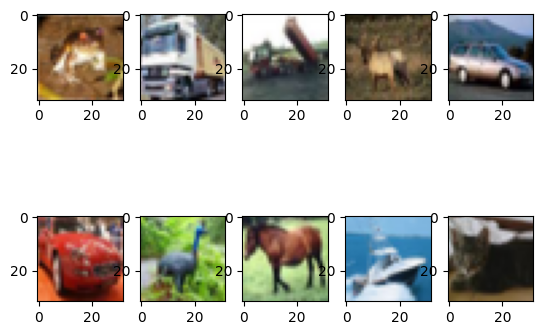

In [7]:
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(x_train[i])

In [8]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
y_train.shape

(50000, 10)

In [10]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [11]:
y_test.shape

(10000, 10)

In [12]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]], dtype=uint8)
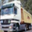

In [13]:
x_train[1]

In [14]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [15]:
x_train[1]

array([[[0.6039216 , 0.69411767, 0.73333335],
        [0.49411765, 0.5372549 , 0.53333336],
        [0.4117647 , 0.40784314, 0.37254903],
        ...,
        [0.35686275, 0.37254903, 0.2784314 ],
        [0.34117648, 0.3529412 , 0.2784314 ],
        [0.30980393, 0.31764707, 0.27450982]],

       [[0.54901963, 0.627451  , 0.6627451 ],
        [0.5686275 , 0.6       , 0.6039216 ],
        [0.49019608, 0.49019608, 0.4627451 ],
        ...,
        [0.3764706 , 0.3882353 , 0.30588236],
        [0.3019608 , 0.3137255 , 0.24313726],
        [0.2784314 , 0.28627452, 0.23921569]],

       [[0.54901963, 0.60784316, 0.6431373 ],
        [0.54509807, 0.57254905, 0.58431375],
        [0.4509804 , 0.4509804 , 0.4392157 ],
        ...,
        [0.30980393, 0.32156864, 0.2509804 ],
        [0.26666668, 0.27450982, 0.21568628],
        [0.2627451 , 0.27058825, 0.21568628]],

       ...,

       [[0.6862745 , 0.654902  , 0.6509804 ],
        [0.6117647 , 0.6039216 , 0.627451  ],
        [0.6039216 , 0

## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [16]:
from keras.backend import clear_session
clear_session()

In [17]:
# Your code here :
input_shape = (32,32,3)


In [18]:
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = keras.Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         720,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [19]:
# Your code here :
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=50, batch_size=512)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.1569 - loss: 2.2614
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.2519 - loss: 2.1216
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3026 - loss: 2.0057
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3300 - loss: 1.9330
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3456 - loss: 1.8904
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3541 - loss: 1.8603
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3653 - loss: 1.8217
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3743 - loss: 1.7843
Epoch 9/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3873 - loss: 1.7667
Epoch 10/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3940 - loss: 1.7374
Epoch 11/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3990 - loss: 1.7221
Epoch 12/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4147 -

*   Plot the cross entropy loss curve and the accuracy curve

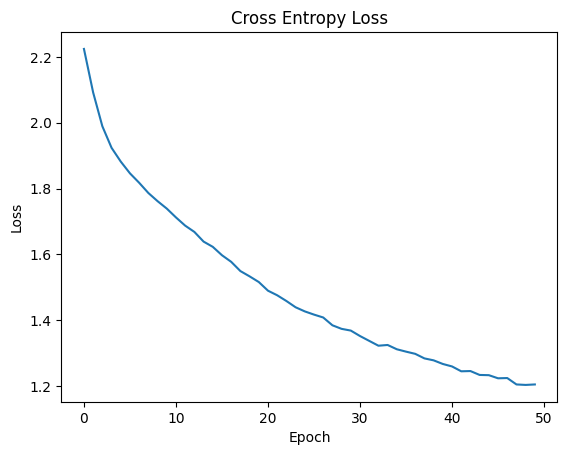

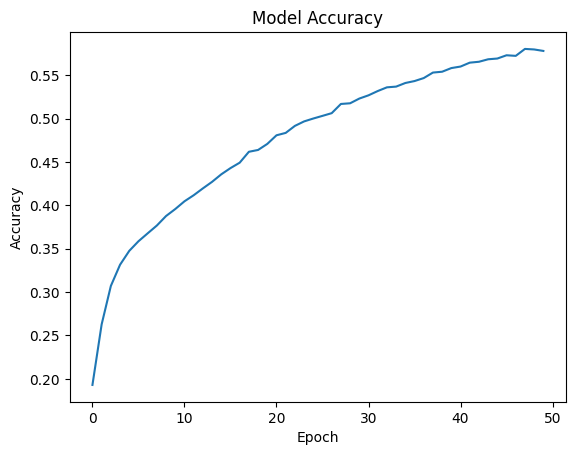

In [20]:

plt.plot(model.history.history['loss'])
plt.title('Cross Entropy Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

plt.plot(model.history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [21]:
from keras.backend import clear_session
clear_session()

In [22]:
# Your code here :
input_shape = (32,32,3)

model_deeper = keras.Sequential()

model_deeper.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
model_deeper.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model_deeper.add(MaxPooling2D((2, 2)))
model_deeper.add(Flatten())
model_deeper.add(Dense(128, activation='relu'))
model_deeper.add(Dense(10, activation='softmax'))

model_deeper.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,060,138 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [23]:
# Your code here :

model_deeper.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model_deeper.fit(x_train, y_train, epochs=50, batch_size=512)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.1466 - loss: 2.2829
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.2560 - loss: 2.1350
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.2901 - loss: 2.0003
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.3188 - loss: 1.9358
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.3447 - loss: 1.8791
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.3597 - loss: 1.8270
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.3741 - loss: 1.7865
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.3890 - loss: 1.7407
Epoch 9/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.3953 - loss: 1.7157
Epoch 10/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.4117 - loss: 1.6806
Epoch 11/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.4216 - loss: 1.6516
Epoch 12/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy:

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


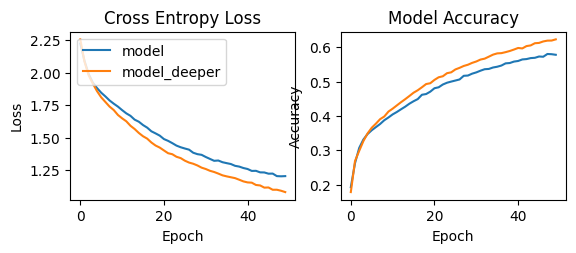

<Figure size 640x480 with 0 Axes>

In [24]:
# Your code here :
plt.subplot(2,2,1)
plt.plot(model.history.history['loss'])
plt.title('Cross Entropy Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.subplot(2,2,2)

plt.plot(model.history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.subplot(2,2,1)

plt.plot(model_deeper.history.history['loss'])
plt.title('Cross Entropy Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.subplot(2,2,2)

plt.plot(model_deeper.history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.subplot(2,2,1)

plt.legend(['model', 'model_deeper'], loc='upper left')
plt.figure()
plt.show()



**Comment on the observation**

*(Double-click or enter to edit)*

...

In [25]:
print('''
Model 1: {}
model 2: {}
'''.format(model.evaluate(x_test,y_test),model_deeper.evaluate(x_test,y_test)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5693 - loss: 1.2227
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5858 - loss: 1.1613

Model 1: [1.2259601354599, 0.5674999952316284]
model 2: [1.1661064624786377, 0.5871999859809875]



*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


In [26]:
# Your code here :
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [33]:
confusion_matrix(np.argmax(y_test, axis=1), y_pred)

array([[705,  46,  39,   8,  12,  10,  23,   7,  93,  57],
       [ 58, 704,   6,   5,   5,   5,  15,  10,  41, 151],
       [116,  20, 363,  58, 119,  95, 129,  54,  26,  20],
       [ 45,  21,  62, 337,  76, 202, 136,  53,  19,  49],
       [ 44,  14, 109,  45, 471,  63, 140,  90,  15,   9],
       [ 23,   6,  67, 148,  83, 461,  75, 102,  14,  21],
       [ 14,  12,  44,  50,  78,  33, 709,  24,  14,  22],
       [ 31,   9,  32,  45,  71,  84,  44, 623,   5,  56],
       [149,  79,  14,  12,   6,  12,  12,   9, 648,  59],
       [ 61, 159,   6,  16,   6,   9,  22,  33,  34, 654]])

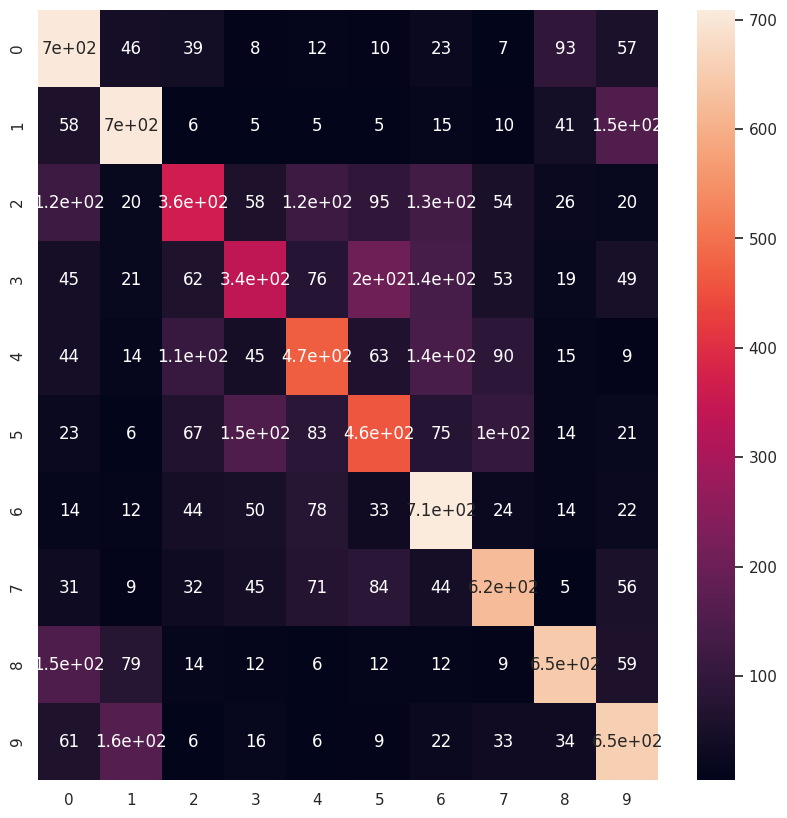

In [36]:
sns.heatmap(confusion_matrix(np.argmax(y_test, axis=1), y_pred), annot=True)
sns.set(rc={'figure.figsize':(20,20)})

**Comment here :**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [38]:
# Your code here :
print(model_deeper.evaluate(x_test,y_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5858 - loss: 1.1613
[1.1661064624786377, 0.5871999859809875]


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [ ]:
from keras.backend import clear_session
clear_session()

In [39]:

input_shape = (64, 64, 3)

model_vgg = keras.Sequential()

model_vgg.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
model_vgg.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_vgg.add(MaxPooling2D((2, 2)))

model_vgg.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_vgg.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_vgg.add(MaxPooling2D((2, 2)))

model_vgg.add(Conv2D(256, (3,= 3), activation='relu', padding='same'))
model_vgg.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_vgg.add(MaxPooling2D((2, 2)))

model_vgg.add(Flatten())
model_vgg.add(Dense(128, activation='relu'))
model_vgg.add(Dense(10, activation='softmax'))

model_vgg.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       2,097,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,243,978 (12.37 MB)

 Trainable params: 3,243,978 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

Epoch 1/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6032 - loss: 1.1385
Epoch 2/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6067 - loss: 1.1387
Epoch 3/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6087 - loss: 1.1292
Epoch 4/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6123 - loss: 1.1223
Epoch 5/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6095 - loss: 1.1222
Epoch 6/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6117 - loss: 1.1210
Epoch 7/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6165 - loss: 1.1128
Epoch 8/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6118 - loss: 1.1143
Epoch 9/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6175 - loss: 1.1054
Epoch 10/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6221 - loss: 1.0939
Epoch 11/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6131 - loss: 1.1087
Epoch 12/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accurac

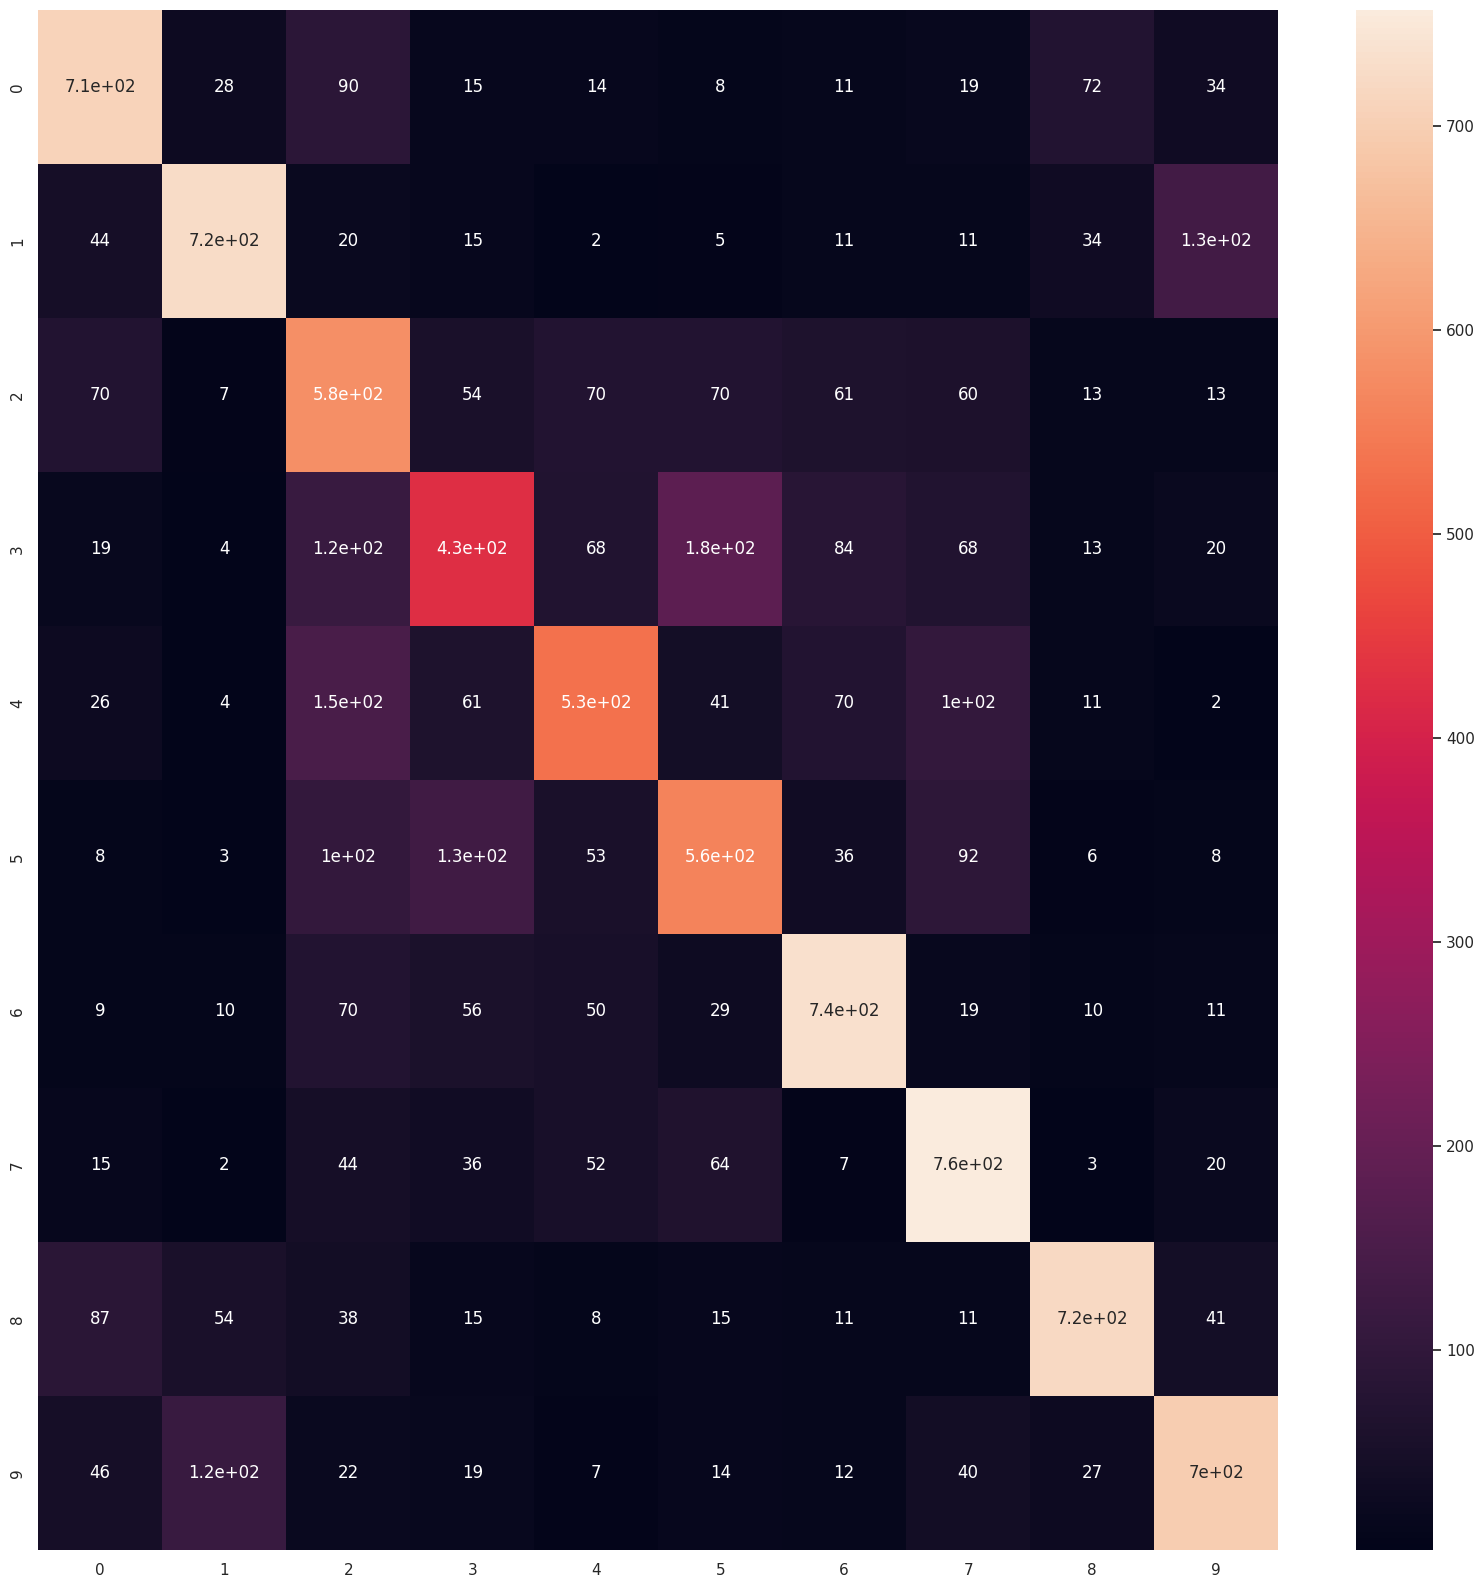

In [41]:



model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


model.fit(x_train, y_train, epochs=100, batch_size=512)


y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)


confusion_matrix(np.argmax(y_test, axis=1), y_pred)
sns.heatmap(confusion_matrix(np.argmax(y_test, axis=1), y_pred), annot=True)
sns.set(rc={'figure.figsize':(20,20)})
plt.show()



# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:



>   Activation functions: introduce non-linearity into a neural network, enabling it to learn complex patterns and relationships in data. Without activation functions, the network would only be able to learn linear mappings, regardless of the number of layers. Activation functions also help control the output of neurons, making it possible to handle diverse tasks such as classification and regression.




	•	Enable non-linear transformations of input data.
	•	Help the network learn from complex data distributions.
	•	Control the range of neuron outputs (e.g., 0-1 for sigmoid).
	•	Aid in convergence during training.

_

2 - Key Differences between sigmoid and softmax:

| Feature                 | Sigmoid Activation                 | Softmax Activation                 |
|-------------------------|-------------------------------------|-------------------------------------|
| **Formula**             | \\( \\sigma(x) = \\frac{1}{1 + e^{-x}} \\) | \\( \\text{softmax}(x_i) = \\frac{e^{x_i}}{\\sum_{j} e^{x_j}} \\) |
| **Output Range**        | Outputs a single value between 0 and 1 | Outputs probabilities for multiple classes, summing to 1 |
| **Use Case**            | Used for binary classification problems or in individual neurons | Used for multi-class classification problems |
| **Behavior**            | Treats each output independently    | Normalizes outputs to represent a probability distribution |
| **Example Use**         | Logistic regression, output layer of binary classification | Output layer for multi-class classification (e.g., CIFAR-10) |

---
_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:

| Feature                 | Categorical Crossentropy           | Binary Crossentropy                |
|-------------------------|-------------------------------------|-------------------------------------|
| **Use Case**            | Multi-class classification problems | Binary classification problems |
| **Targets**             | One-hot encoded vectors (e.g., `[0, 0, 1]`) | Single binary value for each example (e.g., `0` or `1`) |
| **Output Layer**        | Typically used with softmax activation | Typically used with sigmoid activation |
| **Formula**             | \\( L = -\\sum_{i} y_i \\log(\\hat{y}_i) \\) | \\( L = -[y \\log(\\hat{y}) + (1-y) \\log(1-\\hat{y})] \\) |
| **Output Interpretation** | Predicts the probability distribution over multiple classes | Predicts the probability of a single binary outcome |
| **Example Use**         | Image classification with more than two categories (e.g., CIFAR-10) | Binary classification (e.g., spam vs. not spam) |

---

_


In [44]:
from tensorflow import keras
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


base_model = ResNet50(weights='imagenet', include_top=False, input_shape=x_train.shape[1:])

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 15ms/step - accuracy: 0.2195 - loss: 2.2503 - val_accuracy: 0.3003 - val_loss: 1.8914
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 10ms/step - accuracy: 0.3038 - loss: 1.8961 - val_accuracy: 0.3278 - val_loss: 1.8275
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.3332 - loss: 1.8344 - val_accuracy: 0.3510 - val_loss: 1.7790
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.3440 - loss: 1.8069 - val_accuracy: 0.3592 - val_loss: 1.7953
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.3650 - loss: 1.7675 - val_accuracy: 0.3666 - val_loss: 1.7577
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.3691 - loss: 1.7437 - val_accuracy: 0.3733 - val_loss: 1.7346
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.3743 - loss: 1.7297 - val_accuracy: 0.3908 - val_loss: 1.7057
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.3849 - l